In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

In [2]:
df = pd.read_csv("Reviews.csv")
df= df.head(500)
df.shape

(500, 10)

In [3]:
#Let's check if there are any null values
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [4]:
#As there are no null values, we can proceed

<AxesSubplot:title={'center':'Distribution of Reviews based on Ratings'}>

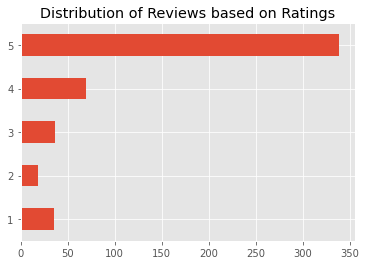

In [5]:
#Let's look at the distribution of ratings based on feedback
df['Score'].value_counts().sort_index().plot(kind='barh', title='Distribution of Reviews based on Ratings')

In [6]:
#Lets perform basic NLTK stuff

In [7]:
#Lets take a sample example and look at it
example = df['Text'][20]
example

"My husband is a Twizzlers addict.  We've bought these many times from Amazon because we're government employees living overseas and can't get them in the country we are assigned to.  They've always been fresh and tasty, packed well and arrive in a timely manner."

In [8]:
#NLTK can tokenize the example and store in one array
tokens = nltk.word_tokenize(example)
#Let's look at first 15 words of the example
tokens[:16]

['My',
 'husband',
 'is',
 'a',
 'Twizzlers',
 'addict',
 '.',
 'We',
 "'ve",
 'bought',
 'these',
 'many',
 'times',
 'from',
 'Amazon',
 'because']

In [9]:
#with nltk, we can also identify parts of speech, those tokens belong to
#and assign it to tagged
tagged = nltk.pos_tag(tokens)
#Let's do similar thing for tagged like we did for tokens
tagged[:10]

[('My', 'PRP$'),
 ('husband', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('Twizzlers', 'NNP'),
 ('addict', 'NN'),
 ('.', '.'),
 ('We', 'PRP'),
 ("'ve", 'VBP'),
 ('bought', 'VBN')]

In [10]:
#Lets now put them into entities and chunk them
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  My/PRP$
  husband/NN
  is/VBZ
  a/DT
  Twizzlers/NNP
  addict/NN
  ./.
  We/PRP
  've/VBP
  bought/VBN
  these/DT
  many/JJ
  times/NNS
  from/IN
  (GPE Amazon/NNP)
  because/IN
  we/PRP
  're/VBP
  government/NN
  employees/NNS
  living/VBG
  overseas/RB
  and/CC
  ca/MD
  n't/RB
  get/VB
  them/PRP
  in/IN
  the/DT
  country/NN
  we/PRP
  are/VBP
  assigned/VBN
  to/TO
  ./.
  They/PRP
  've/VBP
  always/RB
  been/VBN
  fresh/JJ
  and/CC
  tasty/JJ
  ,/,
  packed/VBN
  well/RB
  and/CC
  arrive/JJ
  in/IN
  a/DT
  timely/JJ
  manner/NN
  ./.)


VADER MODEL

In [11]:
#It has value of each word either positive or negative, it calculates the entire
#sentence with these values and finds out for the sentence as a whole

In [12]:
#This model doesnt account for relationship between two words
#which is actually important for human speech

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()


In [14]:
sia.polarity_scores('This aint the best I ever tasted')

{'neg': 0.402, 'neu': 0.598, 'pos': 0.0, 'compound': -0.5216}

In [15]:
sia.polarity_scores('I am feeling great with the experience')

{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6808}

In [16]:
# An example where it fails coudl be when we use idioms
sia.polarity_scores('I am on cloud nine')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [17]:
#It should identitify as positivity but it doesnt cause it fails to identify
#the relationship between each word

In [18]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.6249}

In [19]:
#now we just ran the polarity score for one review but we want to do it for
#all the datasets like a loop until we finish the last row

In [20]:
result = dict()
#We dont have null values in text and Id so we are safe to use them
#Also we shall only use this model on first 500 datasets to make the computation faster

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    result[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [21]:
#Lets convert the result dictionary into dataframe
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how='left')

In [22]:
vaders.head()
#Now we have combined positive, negative and neutral to the original dataset


,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [23]:
#Now we expect for the distribution of stars to be aligned the way
#we want it i.e. We would want to have 1star reviews to be more negative and
#5 star reviews to be more positive

<AxesSubplot:xlabel='Score', ylabel='compound'>

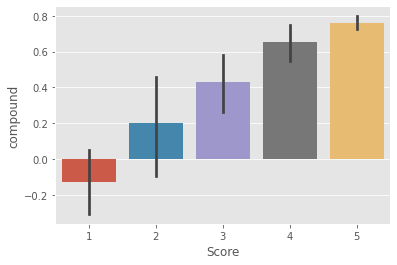

In [24]:
#Lets seaborn to know about the distribution
sns.barplot(data=vaders, x='Score', y='compound')
#we shall compound as it is finializes about the sentiment of sentence

<AxesSubplot:xlabel='Score', ylabel='pos'>

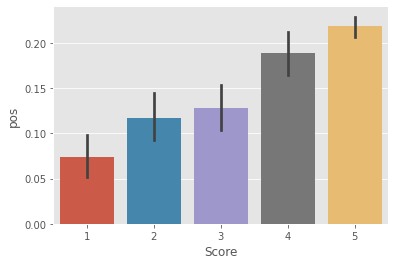

In [25]:
#We can similarly do this as score vs pos, score vs negative
sns.barplot(data=vaders, x='Score',y='pos')

<AxesSubplot:xlabel='Score', ylabel='neg'>

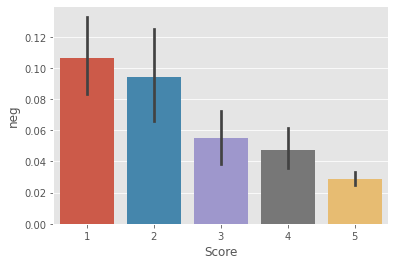

In [26]:
sns.barplot(data=vaders, x='Score',y='neg')

In [27]:
#We wanted it to be as we expected, in the 5 score reviews should be more for positive side
#and 1 star should be more for neg, and also as you go to left in score wise, your pos should also increase
#and neg should drop, we can clearly see that happening so we can assume our model
#is working fine